# Simple Linear Regression Model

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Objectives 
* Implement Linear Regression in SKLearn
* Implemenent Linear Regression in Statsmodel
* Discuss Model Evaluation in Linear Regression.

## SKLearn Code;

In [102]:
# load the library
from sklearn.linear_model import LinearRegression

In [103]:
# load the data
df = pd.read_csv("../data/dummy.csv", index_col=0)
df.head()

,X,Y
0,0.496714,-0.421942
1,-0.138264,-0.697174
2,0.647689,0.952663
3,1.523030,2.243782
4,-0.234153,-0.629592


In [106]:
# prepare data 
X = df["X"]
X = np.array(X).reshape(-1,1)
y = df["Y"]


In [107]:
# create the model object
lin_reg = LinearRegression()

In [110]:
# fit the model to the data
model = lin_reg.fit(X, y)

In [111]:
# slope
model.coef_

array([1.85674284])

In [112]:
# y-intercept
model.intercept_

0.0074278298639669504

In [113]:
# get parameters for this estimator.
model.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [114]:
# predict using linear model
# When X = 0.647689	, Y = 0.952663
value = 0.647689
reshape_value = np.array(value).reshape(-1,1)
model.predict(reshape_value)

array([1.21001974])

In [115]:
# coefficient of determination R^2 of the prediction
model.score(X, y)

0.7610892255181196

* Calculates how well the linear regression model fits the data, with 1.0 being a perfect fit and 0.0 indicating no linear relationship

## Statsmodel Code

### Using ```sm.OLS()```

Used to perform linear regression by directly specifying the explanatory variables and the response variable as separate arrays.

Allows for more fine-grained control over the model fiiting process, including specifying the intercept, regularization methods, and weighting schemes.

Requires the user to manually add a constant term to the explanatory variables if needed.

A constant represents the value of the dependent variable when all independent variables are equal to zero.
Also helps in centering data, making the interpretation of the regression coefficients more meaningful.

In [116]:
# load the library
import statsmodels.api as sm

In [117]:
# load the data
x = df["X"]
y = df["Y"]

In [118]:
# add constant to the model
x = sm.add_constant(x)

In [120]:
# create model object
model = sm.OLS(y, x)

In [121]:
# fit the model
result = model.fit(method='pinv')

In [122]:
# print the summary output 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     312.2
Date:                Tue, 09 May 2023   Prob (F-statistic):           3.14e-32
Time:                        11:37:12   Log-Likelihood:                -135.71
No. Observations:                 100   AIC:                             275.4
Df Residuals:                      98   BIC:                             280.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0074      0.096      0.078      0.938      -0.182       0.197
X              1.8567      0.105     17.669      0.000       1.648       2.065
==============================================================================
Omnibus:                        1.950   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.909
Skew:                           0.327   Prob(JB):                        0.385
Kurtosis:                       2.829   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
# get the degrees of freedom for the model
df_model = result.df_model
df_model

1.0

In [126]:
# get the names of endogenous variables 
result.model.endog_names

'Y'

### Using ```sm.formular.ols()```

Used to perform linear regression by specifying the model formular using a string that looks like a mathematical equation.
More concise and intuitive for users familiar with R or other statistical software.
Automatically handles tasks like adding an intercept term to the model.

In [127]:
# load the library
import statsmodels.api as sm

In [128]:
# no need to prepare data
df.head()

,X,Y
0,0.496714,-0.421942
1,-0.138264,-0.697174
2,0.647689,0.952663
3,1.523030,2.243782
4,-0.234153,-0.629592


In [129]:
# create the model object
model = sm.formula.ols(formula='Y ~ X', data=df)

In [130]:
# fit the model
reg_result = model.fit()

In [131]:
# print the summary output
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     312.2
Date:                Tue, 09 May 2023   Prob (F-statistic):           3.14e-32
Time:                        11:40:19   Log-Likelihood:                -135.71
No. Observations:                 100   AIC:                             275.4
Df Residuals:                      98   BIC:                             280.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0074      0.096      0.078      0.938      -0.182       0.197
X              1.8567      0.105     17.669      0.000       1.648       2.065
==============================================================================
Omnibus:                        1.950   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.909
Skew:                           0.327   Prob(JB):                        0.385
Kurtosis:                       2.829   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Evaluation 

Assess the performance of the model and its ability to make accurate predictions. 

### Mean Squared Error (MSE)

* Is a commonly used metric for evaluating the performance of a regression line by measuring how close a regression Line is to a set of data points. 
* Is the Mean or Average of the square of the difference between actual and predicted values.
* Mathematically, the MSE is defined as;

>>> $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_1 - \hat{y}_1)^2$

Where 
* n - number of observations in the test dataset.
* $y_1$ - the actual value of the dependent variable.
* $\hat{y}_1$ - the predicted value of the dependent variable.

In [132]:
# load the data 
df.head()

,X,Y
0,0.496714,-0.421942
1,-0.138264,-0.697174
2,0.647689,0.952663
3,1.523030,2.243782
4,-0.234153,-0.629592


In [133]:
# prepare data 
X = df["X"]
X = np.array(X).reshape(-1,1)
y = df["Y"]

In [134]:
# create the model object
lin_reg = LinearRegression()

In [135]:
# fit the model to the data
model = lin_reg.fit(X, y)

In [136]:
# make predictions
df["predictions"] = model.predict(np.array(df["X"]).reshape(-1,1))
df.head()

,X,Y,predictions
0,0.496714,-0.421942,0.929698
1,-0.138264,-0.697174,-0.249293
2,0.647689,0.952663,1.210019
3,1.523030,2.243782,2.835303
4,-0.234153,-0.629592,-0.427335


In [137]:
# calculate the errors
df["residuals"] = df["predictions"] - df["Y"]
df.head() 

,X,Y,predictions,residuals
0,0.496714,-0.421942,0.929698,1.351641
1,-0.138264,-0.697174,-0.249293,0.447881
2,0.647689,0.952663,1.210019,0.257356
3,1.523030,2.243782,2.835303,0.591520
4,-0.234153,-0.629592,-0.427335,0.202258


In [138]:
# get the absolute errors
df["abs_errors"] = df["residuals"].apply(lambda x: abs(x))
df.head()

,X,Y,predictions,residuals,abs_errors
0,0.496714,-0.421942,0.929698,1.351641,1.351641
1,-0.138264,-0.697174,-0.249293,0.447881,0.447881
2,0.647689,0.952663,1.210019,0.257356,0.257356
3,1.523030,2.243782,2.835303,0.591520,0.591520
4,-0.234153,-0.629592,-0.427335,0.202258,0.202258


In [139]:
# calculate the squared absolute error
df["sqr error"] = df["abs_errors"].apply(lambda x: np.square(x))
df.head()

,X,Y,predictions,residuals,abs_errors,sqr error
0,0.496714,-0.421942,0.929698,1.351641,1.351641,1.826933
1,-0.138264,-0.697174,-0.249293,0.447881,0.447881,0.200597
2,0.647689,0.952663,1.210019,0.257356,0.257356,0.066232
3,1.523030,2.243782,2.835303,0.591520,0.591520,0.349896
4,-0.234153,-0.629592,-0.427335,0.202258,0.202258,0.040908


In [140]:
# calculate the mean squared error
mse = np.mean(df["sqr error"])
print(f"The Mean Squarred Error: {np.round(mse,4)}")

The Mean Squarred Error: 0.8836


In [141]:
# using sklearn
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df["Y"], df["predictions"])
print(f"The Mean Squarred Error: {np.round(mse,4)}")

The Mean Squarred Error: 0.8836


The smaller the mean squared error, the closer you are to finding the line of best fit. 

Only a perfect model with no error produces an MSE of zero, and that doen't occur in practice(*Overfitting*).

When the target variable is normally distributed, it is expected that the errors or residuals of the regression model will also follow a normal distribution. In such cases, using the mean squared error (MSE) as the loss function makes sense, as it measures the average of the squared errors, which is a measure of the distance between the predicted and actual values.

MSE put more weight on larger errors than smaller ones, which is desirable in many cases, as we want to penalize the model more for large errors that can have a greater impact on the final result.

If errors are not normally distributed, using the MSE may not be the best choice.

### Root Mean Squared Error (RMSE)

* Is the standard deviation of the residuals.
* Measure of how spread out the residuals are. 
* Similar to Mean Squared Error (MSE) but takes the Square root of the MSE to ensure that the RMSE is expressed in the same units as the response variable.
* Penalizes larger errors more heavily than smaller ones
* To calculate RMSE, first calculate the MSE and then take the Square Root of it. 

>>> $RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_1 - \hat{y}_1)^2}$

In [142]:
# calculate the root mean squared error
rmse = np.sqrt(np.mean(df["sqr error"]))
print(f"The Root Mean Squarred Error: {np.round(rmse,4)}")

The Root Mean Squarred Error: 0.94


In [143]:
# using Sklearn
mse = mean_squared_error(df["Y"], df["predictions"])
rmse = np.sqrt(mse)
print(f"The Mean Squarred Error: {np.round(rmse,4)}")

The Mean Squarred Error: 0.94


### Adjusted $R^2$

* The coefficient of determination, R-squared, is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
* Tells one how well the data fits the model(the goodness of fit)
* Is a number between 0 and 1 that measures how well a statistical model predicts an outcome.

|Coefficient of determination($R^2$)|Interpretation|
|----------------------:|:--------------------:|
|0                     |The model ```does not``` predict the outcome.|
|Between 0 and 1     |The model ```partially``` predicts the outcome.|
|1                     |The model ```perfectly``` predicts the outcome.|



>>>$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$

where 
* $y_i$ is the actual value
* $\hat{y}_i$ is the predicted value
* $\bar{y}$ is the mean of the actual values
* $n$ is the number of observations.


In [73]:
# preview the data 
df.head()

,X,Y,predictions,residuals,abs_errors,sqr error
0,0.496714,-0.421942,0.929698,1.351641,1.351641,1.826933
1,-0.138264,-0.697174,-0.249293,0.447881,0.447881,0.200597
2,0.647689,0.952663,1.210019,0.257356,0.257356,0.066232
3,1.523030,2.243782,2.835303,0.591520,0.591520,0.349896
4,-0.234153,-0.629592,-0.427335,0.202258,0.202258,0.040908


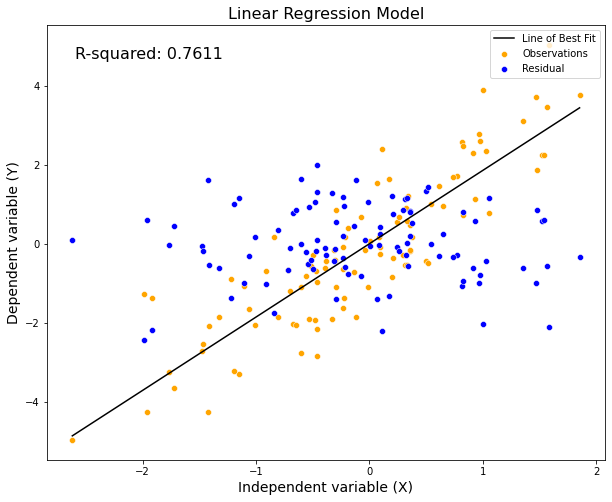

In [100]:
# plot the data, line of best fit, and the residuals
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x=df["X"], y=df["predictions"], color="black", ax=ax, label="Line of Best Fit")
sns.scatterplot(x=df["X"], y=df["Y"], color="orange", ax=ax, label="Observations")
sns.scatterplot(x=df["X"], y=df["residuals"], color="blue", ax=ax, label="Residual")
ax.legend(loc="upper right")

# calculate the R-Squared value and diplay it on the plot
r_squared = model.score(np.array(df["X"]).reshape(-1,1),y)
ax.text(0.05, 0.95, f"R-squared: {r_squared:.4f}", transform=ax.transAxes, fontsize=16, va='top')

ax.set_xlabel("Independent variable (X)", fontsize=14)
ax.set_ylabel("Dependent variable (Y)", fontsize=14)
ax.set_title("Linear Regression Model", fontsize=16)

plt.show()

### Other Regression Statistics



* **Adjusted R-squared** - Modified version of R-squared statistic that adjusts for the number of predictor variables in a regression model. 

Takes into account the number of independent variables used for predicting the target variable and by doing so, determine whether adding new variables to the model actually increases the model fit

Measures how well the independent variables in a linear regression model explain the variablity in the dependent variable and it penalizes the use of unnecessary variables. 

Adjusted $R^2$ is always less than or equal to $R^2$ and a value of 1 indicates a model that perfectly predicts values in the target field while a value of zero indicates that has no predictive value.

>>> $R_{adj}^2 = 1 - \frac{(1 - R^2)(n-1)}{n-k-1}$

where
* $R_{adj}^2$ is the adjusted R-squared
* $R^2$ is the original R-squared
* $n$ is the sample size
* $k$ is the number of predictors in the model.

If a new variable is added to the model but it does not significantly improve the model's ability to explain the variation in the dependent variable, then the increase in R-squared will be small. Since Adjusted R-squared takes into account the number of variables in the model, it will not increase much either. In fact, if the new variable is not useful and adds unnecessary complexity to the model, Adjusted R-squared may actually decrease, indicating that the new variable has a negative impact on the model's performance.

Clearly, it is better to use Adjusted R-squared when there are multiple variables in the regression model. This would allow us to compare models with differing numbers of independent variables.

* **F-statistic** - Measure of the overall significance of the linear regression model. Compares the mean squared error of the regression model to the mean squarred error of the null hypothesis(model with no predictors i.e no correlation whatsover between the predictor and the target.)

If Prob(F-statistic) is greater than 0.05, there is no evidence of relationship between any of the independent variable with the output. If it is less than 0.05, we can say that there is at least one variable which is significantly related with the output.

However, there may be some cases when prob(F-statistic) may be greater than 0.05 but one of the independent variable shows strong correlation. This is because each t-test is carried out with different set of data whereas F-test checks the combined effect including all variables globally.

* **Log-Likelihood** - Measure for fit of the model with the given data. It is useful when we compare two or more models. The higher the value of log-likelihood, the better the model fits the given data. It can range from negative infinity to positive infinity.

* **Coef and std err** - The coef column represents the coefficients for each independent variable along with intercept value. Std err is the standard deviation of the corresponding variable’s coefficient across all the data points.

* **t-values and P>|t|** - t-column provides the t-values corresponding to to each independent variables. T-statistics are used to calculate the p-values. Typically when p-value is less than 0.05, it indicates a strong evidence against null hypothesis which states that the corresponding independent variable has no effect on the dependent variable.

* **Omnibus and Prob(Omnibus)** - Omnibus test checks the normality of the residuals once the model is deployed. If the value is zero, it means the residuals are perfectly normal.For a model to be robust, besides checking R-squared and other rubrics, the residual distribution is also required to be normal ideally. In other words, the residual should not follow any pattern when plotted against the fitted values.

* **Durbin-Watson** - Durbin-Watson statistic provides a measure of autocorrelation in the residual. If the residual values are autocorrelated, the model becomes biased and it is not expected. This simply means that one value should not be depending on any of the previous values. An ideal value for this test ranges from 0 to 4.

* **Jarque-Bera (JB) and Prob (JB)** - similar to Omni test measuring the normalcy of the residuals.


* **Condition Number** - The condition number tests for independence of the predictors. Lower scores are better. When the predictors are not independent, we can run into problems of multicollinearity. 